In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble="""\\usepackage{amsmath}""")
plt.style.use("seaborn-v0_8")

In [2]:
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)


# https://github.com/nschloe/tikzplotlib/issues/567
from matplotlib.lines import Line2D
from matplotlib.legend import Legend

Line2D._us_dashSeq = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols)

In [26]:
import seaborn as sns

palette = sns.color_palette('pastel').as_hex()

In [67]:
df=pd.read_csv("data/data_school_colours_urban.csv")
df.describe()

previous official school colour
count       292                    159
unique        2                     11
top        True         Blue And Black
freq        214                     75

In [68]:
df=df[df["official school colour"]!=""]

In [69]:
top_k=5

In [70]:
top_colours = df.groupby("official school colour").size().sort_values(ascending=False).index[:top_k]
top_colours

Index(['Blue And Black', 'Hunter Green & White', 'Black And White', 'Maroon',
       'White'],
      dtype='object', name='official school colour')

In [71]:
top_colours_labels = [
    "{" + top_colour.replace("&", "and") + "}" for top_colour in top_colours.to_list()
]
top_colours_labels = [
    "Blue - Black",
    "Green",
    "Maroon",
    "Navy Blue",
    "White",
]
top_colours_labels = ["{" + top_colour + "}" for top_colour in top_colours_labels]

In [72]:
top_colours_labels

['{Blue - Black}', '{Green}', '{Maroon}', '{Navy Blue}', '{White}']

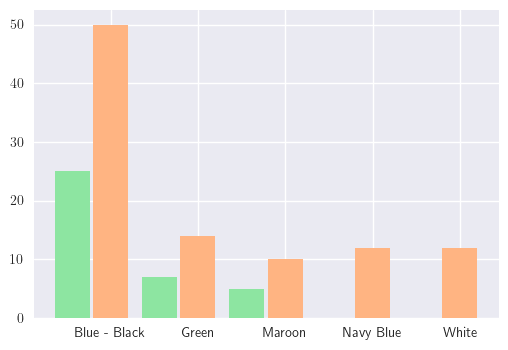

In [73]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
x = np.arange(len(top_colours))
w = 0.4
margin = 0.02
ax.bar(
    x=x - w / 2 - margin,
    height=[
        df[(df["official school colour"] == colour) & (~df["previous"])].shape[0]
        for colour in top_colours
    ],
    width=w,
    bottom=0,
    color=palette[2],
    # edgecolor="black",
    linewidth=1.2,
    label="new",
    tick_label=top_colours_labels,
)
ax.bar(
    x=x + w / 2 + margin,
    height=[
        df[(df["official school colour"] == colour) & (df["previous"])].shape[0]
        for colour in top_colours
    ],
    width=w,
    color=palette[1],
    # edgecolor="black",
    linewidth=1.2,
    label="old",
    tick_label=top_colours_labels,
)
# ax.set_xticks(top_colours.to_list())
tikzplotlib.save(
    "../figures/school_colours.tex",
    extra_tikzpicture_parameters=[
        "scale=0.4",
        """every axis/.style={legend pos=north east, legend style={
                font=\\small}
                }""",
    ],
)